## Analysis and Prediction of the Price for the Agriculture Commodity Data 

### Data
     
    * Used data.csv from the mail.
    * Contains information about the different agriculture commodity. 

In [133]:
## Importing all the necessary Packages 
import pandas as pd 
import re
import  matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta, date

In [42]:
## Importing the Data 
data = pd.read_csv("data.csv")
data

,priceDate,itemName,state,mandiName,arrivals,unitArrivals,variety,minPrice,maxPrice,modalPrice,priceUnit
0,2005-04-11,Potato,NCT of Delhi,Azadpur,106.0,Tonnes,F.A.Q.,300.0,663.0,475.0,Rs/Quintal
1,2005-04-12,Potato,NCT of Delhi,Azadpur,1745.0,Tonnes,F.A.Q.,325.0,688.0,500.0,Rs/Quintal
2,2005-04-13,Potato,NCT of Delhi,Azadpur,1233.0,Tonnes,F.A.Q.,300.0,688.0,488.0,Rs/Quintal
3,2005-04-16,Potato,NCT of Delhi,Azadpur,1654.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
4,2005-04-18,Potato,NCT of Delhi,Azadpur,26.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
...,...,...,...,...,...,...,...,...,...,...,...
3800,2018-08-27,Potato,NCT of Delhi,Azadpur,97.1,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3801,2018-08-28,Potato,NCT of Delhi,Azadpur,973.5,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3802,2018-08-29,Potato,NCT of Delhi,Azadpur,1317.9,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3803,2018-08-30,Potato,NCT of Delhi,Azadpur,1375.3,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal


In [43]:
data.columns ## Getting all number of columns 

Index(['priceDate', 'itemName', 'state', 'mandiName', 'arrivals',
       'unitArrivals', 'variety', 'minPrice', 'maxPrice', 'modalPrice',
       'priceUnit'],
      dtype='object')

In [44]:
## Getting the all the unique values in each column.
## Also getting the number of unique value in each column.
for i in data.columns:
    print(data[i].unique())
    print('Number of Unique values in {} is {}'.format(i,len(data[i].unique())))
    print()
    print()

['2005-04-11' '2005-04-12' '2005-04-13' ... '2018-08-29' '2018-08-30'
 '2018-08-31']
Number of Unique values in priceDate is 3745


['Potato']
Number of Unique values in itemName is 1


['NCT of Delhi']
Number of Unique values in state is 1


['Azadpur']
Number of Unique values in mandiName is 1


[ 106.  1745.  1233.  ... 1317.9 1375.3 1121. ]
Number of Unique values in arrivals is 3073


['Tonnes']
Number of Unique values in unitArrivals is 1


['F.A.Q.' 'Potato' 'Other']
Number of Unique values in variety is 3


[ 300.  325.  350.  313.  344.  375.  338.  438.  425.  406.  400.  413.
  388.  363.  450.  500.  563.  531.  725.  763.  594.  475.  625.  525.
  280.  463.  225.  422.  433.  444.  431.  275.  250.  600.  560.  590.
  630.  688.  750.  875.  281.  188.  213.  219.  200.  480.  538.  550.
  575.  700.  800.  900.  650.   nan  288.  150. 1300.  175.  160.  120.
  140.  180.  220.  238.  240.  260.  580.  588.  788.  775.  813.  844.
 1125.  938. 1000.  663.  640.  540.  520

### Since the column values are same for the columns:
    * Priceunit 
    * State 
    * itemName 
    * Mandiname
    * unitarrivals 
    
### It means even if we remove those column , it won't affect our model. 
### We can generalize it as this data is of prices of Potato in Azadpur Mand in Delhi where Price Unit is mesured in          Rs/Quintal and Unit of arrivals in in Tonnes. 
### And hence can be removed.  

In [45]:
## So droping the columns accoring to the above analysis
p_data = data.drop(['priceUnit','state','itemName','mandiName','unitArrivals'],axis=1)

In [46]:
p_data

,priceDate,arrivals,variety,minPrice,maxPrice,modalPrice
0,2005-04-11,106.0,F.A.Q.,300.0,663.0,475.0
1,2005-04-12,1745.0,F.A.Q.,325.0,688.0,500.0
2,2005-04-13,1233.0,F.A.Q.,300.0,688.0,488.0
3,2005-04-16,1654.0,F.A.Q.,350.0,650.0,475.0
4,2005-04-18,26.0,F.A.Q.,350.0,650.0,475.0
...,...,...,...,...,...,...
3800,2018-08-27,97.1,Potato,700.0,2400.0,1410.0
3801,2018-08-28,973.5,Potato,700.0,2400.0,1410.0
3802,2018-08-29,1317.9,Potato,700.0,2400.0,1410.0
3803,2018-08-30,1375.3,Potato,700.0,2400.0,1410.0


## Now we are left with 6 columns. 

In [47]:
## Finding the number of null values in the data.
p_data.isnull().sum()

priceDate      0
arrivals      27
variety        0
minPrice       1
maxPrice       1
modalPrice    10
dtype: int64

In [48]:
##Percentage of Null data for each major entity
print(f'percentage of null_value:{(p_data.arrivals.isnull().sum()/p_data.shape[0])*100}')
print()
print()
print(f'percentage of null_value:{(p_data.minPrice.isnull().sum()/p_data.minPrice.shape[0])*100}')

percentage of null_value:0.709592641261498


percentage of null_value:0.026281208935611037


In [49]:
## Since very less percentage of points are NULL , we can drop them. 

In [50]:
## Dropping all the rows with NULL VALUES 
p_data = p_data.dropna()
p_data

,priceDate,arrivals,variety,minPrice,maxPrice,modalPrice
0,2005-04-11,106.0,F.A.Q.,300.0,663.0,475.0
1,2005-04-12,1745.0,F.A.Q.,325.0,688.0,500.0
2,2005-04-13,1233.0,F.A.Q.,300.0,688.0,488.0
3,2005-04-16,1654.0,F.A.Q.,350.0,650.0,475.0
4,2005-04-18,26.0,F.A.Q.,350.0,650.0,475.0
...,...,...,...,...,...,...
3800,2018-08-27,97.1,Potato,700.0,2400.0,1410.0
3801,2018-08-28,973.5,Potato,700.0,2400.0,1410.0
3802,2018-08-29,1317.9,Potato,700.0,2400.0,1410.0
3803,2018-08-30,1375.3,Potato,700.0,2400.0,1410.0


In [51]:
## Hence how there are no null values 
p_data.isnull().sum()

priceDate     0
arrivals      0
variety       0
minPrice      0
maxPrice      0
modalPrice    0
dtype: int64

In [54]:
## Saving the cleaned data in another csv file. 
p_data = p_data.drop(['variety'],axis=1)

In [52]:
## So here we have succefully removed all the NULL Values 

In [55]:
p_data

,priceDate,arrivals,minPrice,maxPrice,modalPrice
0,2005-04-11,106.0,300.0,663.0,475.0
1,2005-04-12,1745.0,325.0,688.0,500.0
2,2005-04-13,1233.0,300.0,688.0,488.0
3,2005-04-16,1654.0,350.0,650.0,475.0
4,2005-04-18,26.0,350.0,650.0,475.0
...,...,...,...,...,...
3800,2018-08-27,97.1,700.0,2400.0,1410.0
3801,2018-08-28,973.5,700.0,2400.0,1410.0
3802,2018-08-29,1317.9,700.0,2400.0,1410.0
3803,2018-08-30,1375.3,700.0,2400.0,1410.0


In [85]:
## Loading the saved csv file. 
p_data.to_csv('p_data.csv',index=False)

In [95]:
## Setting the priceDate as index 
p_data = pd.read_csv('p_data.csv')
tdi = pd.DatetimeIndex(p_data.priceDate)
p_data.set_index(tdi,inplace=True)
p_data.drop(columns='priceDate',inplace=True)
p_data.index.name = 'priceDate'

In [96]:
p_data.head()

,arrivals,minPrice,maxPrice,modalPrice
priceDate,,,,
2005-04-11,106.0,300.0,663.0,475.0
2005-04-12,1745.0,325.0,688.0,500.0
2005-04-13,1233.0,300.0,688.0,488.0
2005-04-16,1654.0,350.0,650.0,475.0
2005-04-18,26.0,350.0,650.0,475.0


In [97]:
## Creating 3 diferent tables for each Prediction
mindata = p_data[['minPrice']]
maxdata = p_data[['maxPrice']]
modalPrice = p_data[['modalPrice']]

## Model For prediction of minPrice 

In [99]:
mindata.head()

,minPrice
priceDate,
2005-04-11,300.0
2005-04-12,325.0
2005-04-13,300.0
2005-04-16,350.0
2005-04-18,350.0


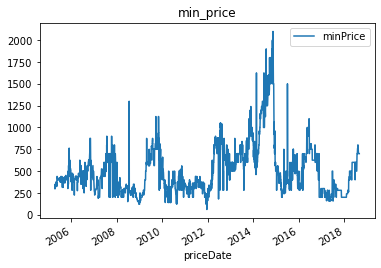

In [119]:
mindata[['minPrice']].plot(title='min_price')

In [102]:
## Decoposing the tie series and will check its trends and Seasonality in data 


In [115]:
fitted_model = ExponentialSmoothing(mindata['minPrice'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
min_score_predictions = fitted_model.forecast(30)

C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Predic

## Model for prediction of Maxprice 


In [118]:
maxdata.head()

,maxPrice
priceDate,
2005-04-11,663.0
2005-04-12,688.0
2005-04-13,688.0
2005-04-16,650.0
2005-04-18,650.0


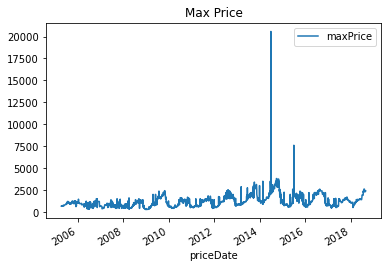

In [120]:
maxdata[['maxPrice']].plot(title = 'Max Price')


In [122]:
## Theres definately an outlier 

In [124]:
fitted_model = ExponentialSmoothing(maxdata['maxPrice'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
max_score_predictions = fitted_model.forecast(30)

C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Predic

## Prediction for ModalPrice 

In [125]:
modalPrice.head()

,modalPrice
priceDate,
2005-04-11,475.0
2005-04-12,500.0
2005-04-13,488.0
2005-04-16,475.0
2005-04-18,475.0


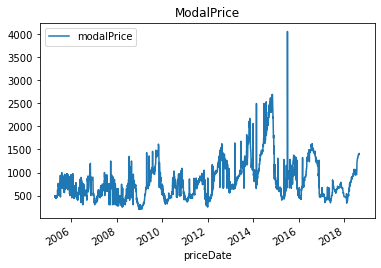

In [126]:
modalPrice[['modalPrice']].plot(title = 'ModalPrice')

In [127]:
## There definately an outlier after 2015 

In [132]:
fitted_model = ExponentialSmoothing(modalPrice['modalPrice'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
modal_score_predictions = fitted_model.forecast(30)


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Predic

## Creating the Final Dataframe 

In [145]:
## The Starting date will be last Date in the Data 
## End date will be lastDate + 30 days 
print('The starting date will be {}'.format(p_data.index[-1]))
print('The end date will be {}'.format(p_data.index[-1] + timedelta(days=30)))

The starting date will be 2018-08-31 00:00:00
The end date will be 2018-09-30 00:00:00


In [163]:
## Generating the timestamp of the predicted values 
## https://www.w3resource.com/python-exercises/date-time-exercise/python-date-time-exercise-50.php
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)


Prediction_dates = []
start_dt = date(2018,8,31)
end_dt = date(2018, 9, 30)
for dt in daterange(start_dt, end_dt):
    Prediction_dates.append(dt.strftime("%Y-%m-%d"))

In [177]:
## Creating the Final Predicted Dataframe 
data = {'priceDate':Prediction_dates[1::],'minPrice':min_score_predictions,'maxPrice':max_score_predictions,'modalPrice':modal_score_predictions}
Predicted_Data = pd.DataFrame(data)


In [179]:
tdi = pd.DatetimeIndex(Predicted_Data.priceDate)
Predicted_Data.set_index(tdi,inplace=True)
Predicted_Data.drop(columns='priceDate',inplace=True)
Predicted_Data.index.name = 'priceDate'

In [185]:
Predicted_Data.head()

,minPrice,maxPrice,modalPrice
priceDate,,,
2018-09-01,709.192480,2367.538476,1394.257760
2018-09-02,722.657934,2409.858004,1409.378100
2018-09-03,716.313258,2414.559900,1404.943079
2018-09-04,724.435470,2423.168117,1416.156648
2018-09-05,736.867935,2384.320828,1429.953853


In [187]:
Predicted_Data.shape

(30, 3)

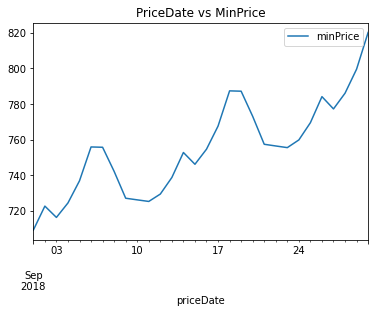

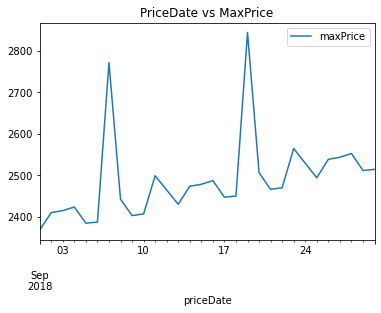

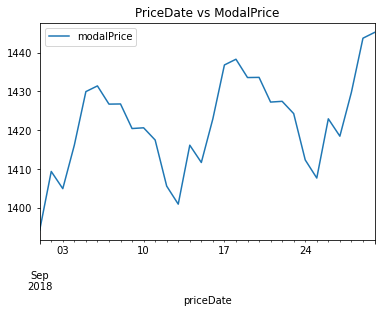

In [183]:
Predicted_Data[['minPrice']].plot(title = 'PriceDate vs MinPrice')
print()
print()
Predicted_Data[['maxPrice']].plot(title = 'PriceDate vs MaxPrice')
print()
print()
Predicted_Data[['modalPrice']].plot(title = 'PriceDate vs ModalPrice')
print()
print()

## Observation 

    * Minimum keeps increasing with the time 
    * Maximum Price remains except for the first two days of 1st and 3rd week.
    * Model Price is at peak in first 2-3 days of 1st and 3rd week.